In [1]:
!pip3 install vnstock
from vnstock import *

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error
import warnings

warnings.filterwarnings('ignore')

In [3]:
VIB = stock_historical_data(symbol = "VIB", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")


In [4]:
VIB = VIB[['Close']]
VIB

,Close
Time,
2017-06-02,3320
2017-06-05,3290
2017-06-06,3320
2017-06-07,3340
2017-06-08,3310
...,...
2023-12-11,19200
2023-12-12,19200
2023-12-13,19050


In [5]:
VIB['Target'] = VIB.Close.shift(-1)
VIB.dropna(inplace = True)
VIB.head()

,Close,Target
Time,,
2017-06-02,3320,3290.0
2017-06-05,3290,3320.0
2017-06-06,3320,3340.0
2017-06-07,3340,3310.0
2017-06-08,3310,3290.0


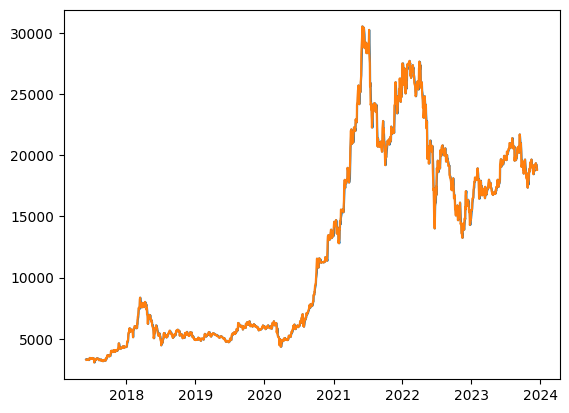

In [6]:
X = VIB[['Close']]
y = VIB[['Target']]

plt.plot(X)
plt.plot(y)
plt.show()

In [7]:
# chia train, test
train_size = int(0.7 * len(VIB))
test_size = len(VIB) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [8]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

SVR(C=1000, degree=2, kernel='poly')

In [9]:
# dự đoán giá đóng cửa trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)


In [10]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
mae_poly = mean_absolute_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))
msle_poly = mean_squared_log_error(y_test, y_pred_poly)

In [11]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MAE: ",  mae_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)
print("RBF MSLE: ", msle_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MAE:",  mae_poly)
print("Poly Testing RMSE:", test_rmse_poly)
print("Poly MSLE: ", msle_poly)

RBF MAPE: 1.6573627349101505
RBF MAE:  318.9576352770382
RBF Testing RMSE: Target    444.228003
dtype: float64
RBF MSLE:  0.0005298966059851151
Poly MAPE: 10.979838951775896
Poly MAE: 2058.5264491277485
Poly Testing RMSE: Target    2189.220973
dtype: float64
Poly MSLE:  0.016198042749046206


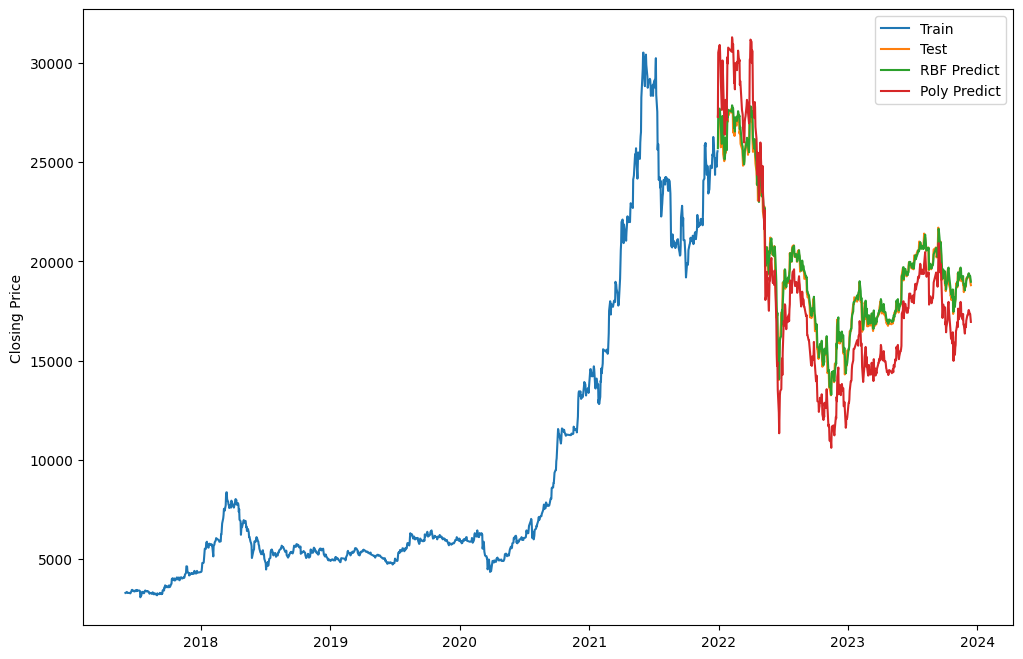

In [12]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [13]:
# lấy giá trị Close của ngày cuối cùng trong dataset
last_row = VIB.tail(1)
last_data = last_row['Close'].values.reshape(-1,1)
last_data

array([[18900]])

In [14]:
# tạo mảng chứa giá trị predict của 60 ngày tiếp theo
x_next_60_days_rbf = []
x_next_60_days_poly = []
# predict giá Close 60 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(60):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_60_days_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(60):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_60_days_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_60_days_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_60_days_poly)

Kết quả dự đoán sử dụng RBF: [array([18971.56086733]), array([19040.29354513]), array([19106.22135115]), array([19169.37956904]), array([19229.81399483]), array([19287.57949828]), array([19342.73862825]), array([19395.36028532]), array([19445.51847888]), array([19493.29118069]), array([19538.75928181]), array([19582.00565614]), array([19623.11433019]), array([19662.16975616]), array([19699.25618355]), array([19734.45712301]), array([19767.85489532]), array([19799.53025797]), array([19829.56210147]), array([19858.02720788]), array([19885.00006412]), array([19910.55272304]), array([19934.75470601]), array([19957.67294086]), array([19979.37172999]), array([19999.91274377]), array([20019.35503501]), array([20037.75507069]), array([20055.16677779]), array([20071.64160022]), array([20087.22856452]), array([20101.97435219]), array([20115.92337688]), array([20129.11786493]), array([20141.59793796]), array([20153.40169658]), array([20164.56530419]), array([20175.12307031]), array([20185.1075328

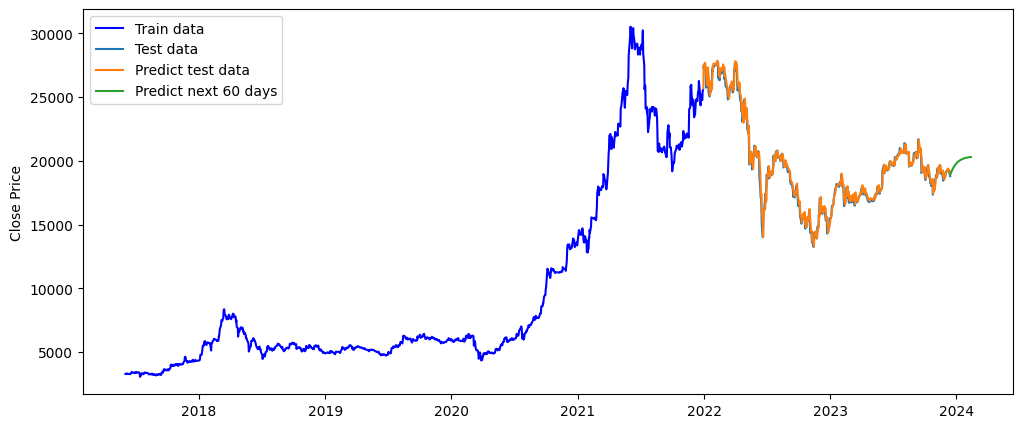

In [17]:
#vẽ mô hình
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data', color = 'b')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred_rbf, label='Predict test data')

last_date = X_test.index[-1]
next_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='D')
plt.plot(next_dates, x_next_60_days_rbf, label='Predict next 60 days')

plt.ylabel('Close Price')
plt.legend(loc= 'upper left')
plt.show()